# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['cherskiy',
 'ushuaia',
 'hobart',
 'kapit',
 'punta arenas',
 'rikitea',
 'abu samrah',
 'cape town',
 'khatanga',
 'lompoc',
 'kutum',
 'victoria',
 'barentsburg',
 'erenhot',
 'narsaq',
 'jamestown',
 'bengkulu',
 'barawe',
 'kodiak',
 'nizhneyansk',
 'kariba',
 'busselton',
 'bundaberg',
 'arraial do cabo',
 'grindavik',
 'havre-saint-pierre',
 'puerto ayora',
 'beringovskiy',
 'albany',
 'port blair',
 'vaitupu',
 'okhotsk',
 'port pirie',
 'kavieng',
 'dikson',
 'qaanaaq',
 'coihueco',
 'martapura',
 'dolbeau',
 'xuddur',
 'cap malheureux',
 'inhambane',
 'kapaa',
 'vostok',
 'alofi',
 'mataura',
 'baneh',
 'ponta do sol',
 'bambous virieux',
 'chokurdakh',
 'coari',
 'taolanaro',
 'saint-philippe',
 'latung',
 'papara',
 'severo-kurilsk',
 'hilo',
 'methven',
 'pavlohrad',
 'lata',
 'fortuna',
 'klaksvik',
 'provideniya',
 'hermanus',
 'mar del plata',
 'butaritari',
 'cervo',
 'tasiilaq',
 'longyearbyen',
 'la palma',
 'caborca',
 'kindu',
 'clyde river',
 'tosya',
 'plettenbe

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#lists 
longitude =  []
latitude = []
humidity = []
temp_max = []
wind = []
clouds = []
date = []
country = []
city_name = []

#count variables
count_one = 1
set_one = 1

url = "http://api.openweathermap.org/data/2.5/weather?"

#loops
for city in cities:
    weather_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    try:
        response =requests.get(weather_url).json()
        print(f"Processing Record {count_one} of Set {set_one} | {city.title()}")
        longitude.append(response["coord"]["lon"])
        latitude.append(response["coord"]["lat"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
    except:
        print("City not found. Skipping...")
    
    count_one += 1
    if count_one == 49:
        count_one = 1
        set_one += 1
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | Cherskiy
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Hobart
Processing Record 4 of Set 1 | Kapit
Processing Record 5 of Set 1 | Punta Arenas
Processing Record 6 of Set 1 | Rikitea
Processing Record 7 of Set 1 | Abu Samrah
Processing Record 8 of Set 1 | Cape Town
Processing Record 9 of Set 1 | Khatanga
Processing Record 10 of Set 1 | Lompoc
Processing Record 11 of Set 1 | Kutum
Processing Record 12 of Set 1 | Victoria
Processing Record 13 of Set 1 | Barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | Erenhot
Processing Record 15 of Set 1 | Narsaq
Processing Record 16 of Set 1 | Jamestown
Processing Record 17 of Set 1 | Bengkulu
Processing Record 18 of Set 1 | Barawe
City not found. Skipping...
Processing Record 19 of Set 1 | Kodiak
Processing Record 20 of Set 1 | Nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | Kariba
Processing Record 22 of Set 1 | Busselton
Processing Record 23 of Set 1

Processing Record 2 of Set 5 | Faanui
Processing Record 3 of Set 5 | Te Anau
Processing Record 4 of Set 5 | Buala
Processing Record 5 of Set 5 | Rongcheng
Processing Record 6 of Set 5 | Mandalgovi
Processing Record 7 of Set 5 | San Quintin
Processing Record 8 of Set 5 | Tautira
Processing Record 9 of Set 5 | Dubti
Processing Record 10 of Set 5 | Zheleznogorsk-Ilimskiy
Processing Record 11 of Set 5 | Albania
Processing Record 12 of Set 5 | Yichun
Processing Record 13 of Set 5 | Bethel
Processing Record 14 of Set 5 | Tsihombe
City not found. Skipping...
Processing Record 15 of Set 5 | Nadvoitsy
Processing Record 16 of Set 5 | Guerrero Negro
Processing Record 17 of Set 5 | Sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 5 | Sao Joao Da Barra
Processing Record 19 of Set 5 | Entebbe
Processing Record 20 of Set 5 | Laguna
Processing Record 21 of Set 5 | Port Hardy
Processing Record 22 of Set 5 | Haines Junction
Processing Record 23 of Set 5 | Umzimvubu
City not found. Sk

Processing Record 46 of Set 8 | Motomiya
Processing Record 47 of Set 8 | Ilulissat
Processing Record 48 of Set 8 | Itaqui
Processing Record 1 of Set 9 | Cambui
Processing Record 2 of Set 9 | Constitucion
Processing Record 3 of Set 9 | Kruisfontein
Processing Record 4 of Set 9 | Malartic
Processing Record 5 of Set 9 | Antsohihy
Processing Record 6 of Set 9 | Saint-Denis
Processing Record 7 of Set 9 | Taksimo
Processing Record 8 of Set 9 | Patu
Processing Record 9 of Set 9 | Male
Processing Record 10 of Set 9 | Broome
Processing Record 11 of Set 9 | Hede
Processing Record 12 of Set 9 | Mrirt
City not found. Skipping...
Processing Record 13 of Set 9 | Ngunguru
Processing Record 14 of Set 9 | Moriyama
Processing Record 15 of Set 9 | Ilka
City not found. Skipping...
Processing Record 16 of Set 9 | Alamos
Processing Record 17 of Set 9 | Dharchula
Processing Record 18 of Set 9 | Presidente Epitacio
Processing Record 19 of Set 9 | Awjilah
Processing Record 20 of Set 9 | Mahenge
Processing Reco

Processing Record 41 of Set 12 | Buqayq
City not found. Skipping...
Processing Record 42 of Set 12 | Lebanon
Processing Record 43 of Set 12 | Severnyy
Processing Record 44 of Set 12 | Manicore
Processing Record 45 of Set 12 | Zyryanka
Processing Record 46 of Set 12 | Santa
Processing Record 47 of Set 12 | Puno
Processing Record 48 of Set 12 | Vangaindrano
Processing Record 1 of Set 13 | Atsiki
City not found. Skipping...
Processing Record 2 of Set 13 | Kuruman
Processing Record 3 of Set 13 | Kavaratti
Processing Record 4 of Set 13 | Maceio
Processing Record 5 of Set 13 | Praia Da Vitoria
Processing Record 6 of Set 13 | Nenjiang
Processing Record 7 of Set 13 | Valparaiso
Processing Record 8 of Set 13 | Bambanglipuro
Processing Record 9 of Set 13 | Dmitriyevka
Processing Record 10 of Set 13 | Tonantins
Processing Record 11 of Set 13 | Karpathos
Processing Record 12 of Set 13 | Umm Lajj
Processing Record 13 of Set 13 | Yaviza
Processing Record 14 of Set 13 | Amos
Processing Record 15 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#dictionary
Cities_df = pd.DataFrame({"City": city_name,
                        "Temperature": temp_max,
                        "Humidity": humidity,
                        "Date": date,
                        "Cloudiness" : clouds,
                        "Windspeed": wind,
                        "Country": country,
                        "Latitude": latitude,
                        "Longitude": longitude
                         })
Cities_df.to_csv("CitiesDF.csv", index=False)
Cities_df


,City,Temperature,Humidity,Date,Cloudiness,Windspeed,Country,Latitude,Longitude
0,Cherskiy,-7.67,96,1635912679,89,8.39,RU,68.7500,161.3000
1,Ushuaia,48.24,93,1635912679,100,2.68,AR,-54.8000,-68.3000
2,Hobart,67.86,77,1635912680,100,1.01,AU,-42.8794,147.3294
3,Kapit,89.53,61,1635912680,88,1.23,MY,2.0167,112.9333
4,Punta Arenas,48.31,87,1635912680,90,6.91,CL,-53.1500,-70.9167
...,...,...,...,...,...,...,...,...,...
540,Umluj,79.65,59,1635912948,0,8.66,SA,25.0213,37.2685
541,Yaviza,72.97,99,1635912949,100,0.18,PA,8.1537,-77.6931
542,Amos,26.87,78,1635912949,100,6.29,CA,48.5669,-78.1162
543,São Félix do Xingu,72.05,98,1635912950,100,0.40,BR,-6.6447,-51.9950


In [ ]:
Cities_df.columns

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

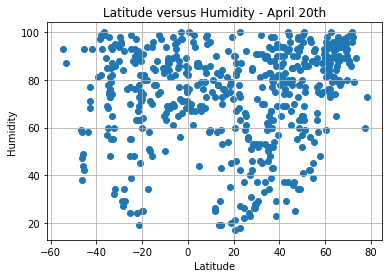

In [25]:
plt.scatter(Cities_df["Latitude"], Cities_df["Humidity"])
plt.title("Latitude versus Humidity - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig('Lat_v_Humidity.png')

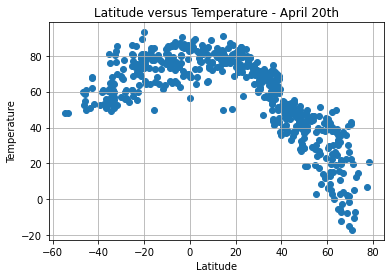

In [26]:
plt.scatter(Cities_df["Latitude"], Cities_df["Temperature"])
plt.title("Latitude versus Temperature - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig('Lat_v_Temp.png')

## Latitude vs. Cloudiness Plot

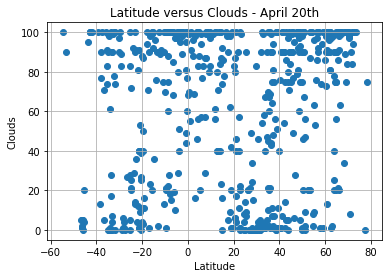

In [27]:

plt.scatter(Cities_df["Latitude"], Cities_df["Cloudiness"])
plt.title("Latitude versus Clouds - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid(True)
plt.savefig('Lat_v_Cloudiness.png')

## Latitude vs. Wind Speed Plot

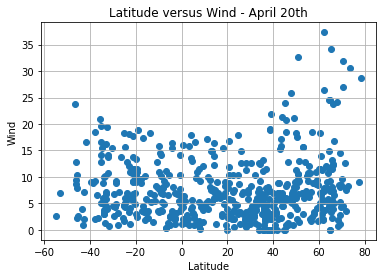

In [28]:
plt.scatter(Cities_df["Latitude"], Cities_df["Windspeed"])
plt.title("Latitude versus Wind - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.grid(True)
plt.savefig('Lat_v_Windspeed.png')

## Linear Regression

Regression line equation is: y = -1.08x + 94.02
The r-squared is: -0.8766002243558118


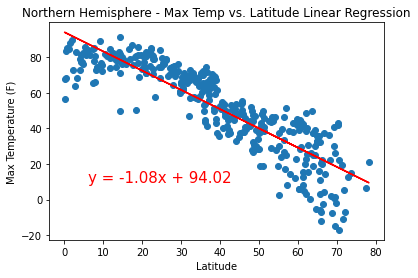

In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = Cities_df.loc[pd.to_numeric(Cities_df["Latitude"]).astype(float) > 0, :]
southern_df = Cities_df.loc[pd.to_numeric(Cities_df["Latitude"]).astype(float) < 0, :]

#linear regression 
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.54x + 82.19
The r-squared is: 0.6530963238582588


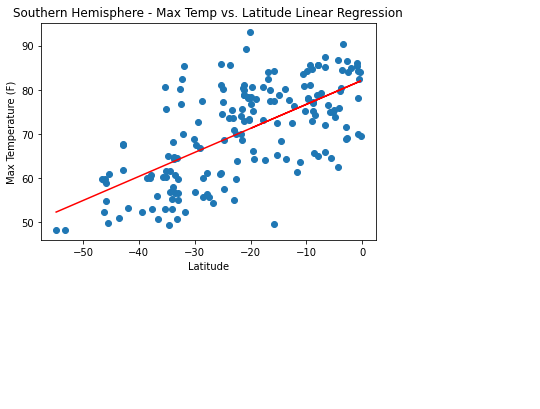

In [36]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.31x + 60.93
The r-squared is: 0.2911533953673298


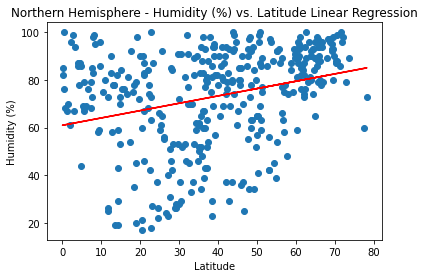

In [38]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.22x + 78.43
The r-squared is: 0.14867408976253826


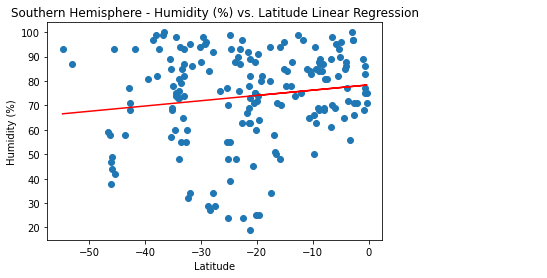

In [40]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 48.1
The r-squared is: 0.1716070848625711


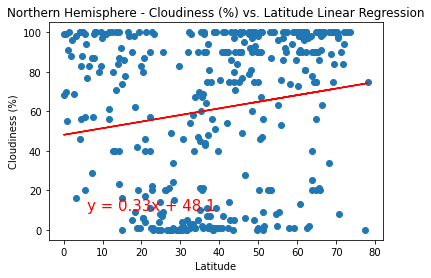

In [41]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.71x + 71.61
The r-squared is: 0.233519346432778


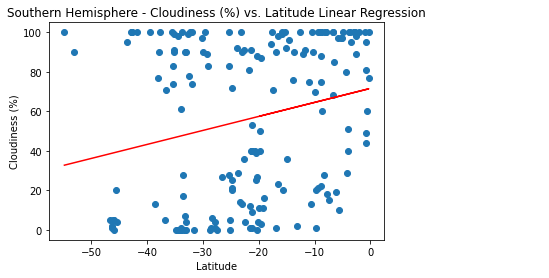

In [42]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.71x + 71.61
The r-squared is: 0.233519346432778


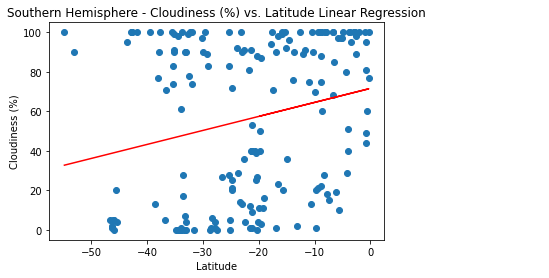

In [43]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 4.81
The r-squared is: 0.22154835351568758


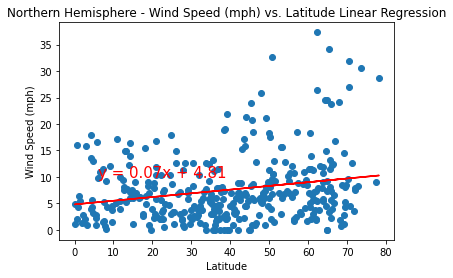

In [45]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 6.48
The r-squared is: -0.14686270736468207


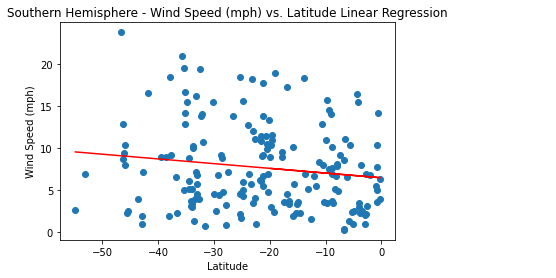

In [46]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()